In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn import metrics

# 1. Data ingest #

In [76]:
# data from ISL book: https://trevorhastie.github.io/ISLR/data.html
df = pd.read_csv("Auto.csv")
df = df.replace('?', np.nan)
df = df.ffill()
print(df.head())
# indicate which columns should be treated as categorical
df_cat = df.astype({'origin': 'category', 'horsepower': 'int64'})
df_cat.dtypes

    mpg  cylinders  displacement horsepower  weight  acceleration  year   
0  18.0          8         307.0        130    3504          12.0    70  \
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


mpg              float64
cylinders          int64
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [77]:
# Split the data into training (80%) and validation set (20%)
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
valid = df[~mask]

# 2. Excercises
### a)

In [78]:
y, X = dmatrices('mpg ~ horsepower ', data=df_cat, return_type='dataframe')

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     605.1
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.08e-81
Time:                        21:36:16   Log-Likelihood:                -1195.2
No. Observations:                 397   AIC:                             2394.
Df Residuals:                     395   BIC:                             2402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0619      0.717     55.905      0.000      38.653      41.471
horsepower    -0.1588      0.006    -24.599      0.000      -0.171      -0.146
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.444
Skew:                           0.494   Prob(JB):                     0.000163
Kurtosis:                       3.278   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b)

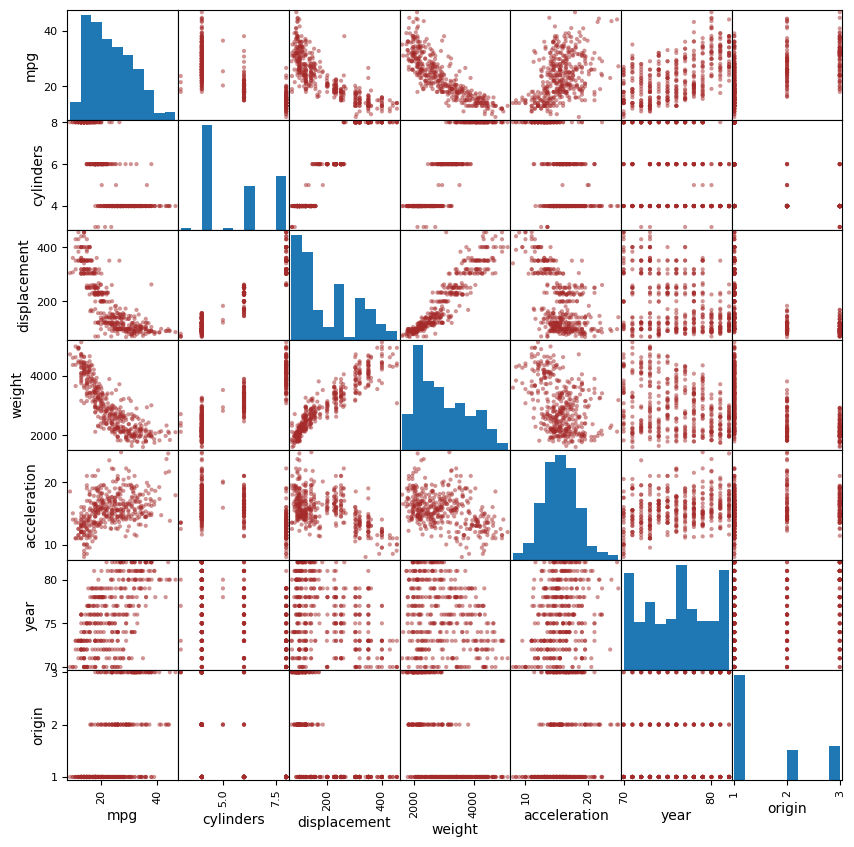

In [79]:
# some columns contain categorical data
# scatter_plot 
_ = pd.plotting.scatter_matrix(df, color="brown",figsize=(10,10),)

In [80]:
df[df.columns.difference(["name"])].corr('pearson')


,acceleration,cylinders,displacement,horsepower,mpg,origin,weight,year
acceleration,1.000000,-0.504061,-0.544162,-0.687768,0.422297,0.210084,-0.419502,0.282901
cylinders,-0.504061,1.000000,0.950920,0.842826,-0.776260,-0.564972,0.897017,-0.346717
displacement,-0.544162,0.950920,1.000000,0.897168,-0.804443,-0.610664,0.933104,-0.369804
horsepower,-0.687768,0.842826,0.897168,1.000000,-0.777842,-0.453590,0.864218,-0.417440
mpg,0.422297,-0.776260,-0.804443,-0.777842,1.000000,0.563698,-0.831739,0.581469
origin,0.210084,-0.564972,-0.610664,-0.453590,0.563698,1.000000,-0.581265,0.184314
weight,-0.419502,0.897017,0.933104,0.864218,-0.831739,-0.581265,1.000000,-0.307900
year,0.282901,-0.346717,-0.369804,-0.417440,0.581469,0.184314,-0.307900,1.000000


c)

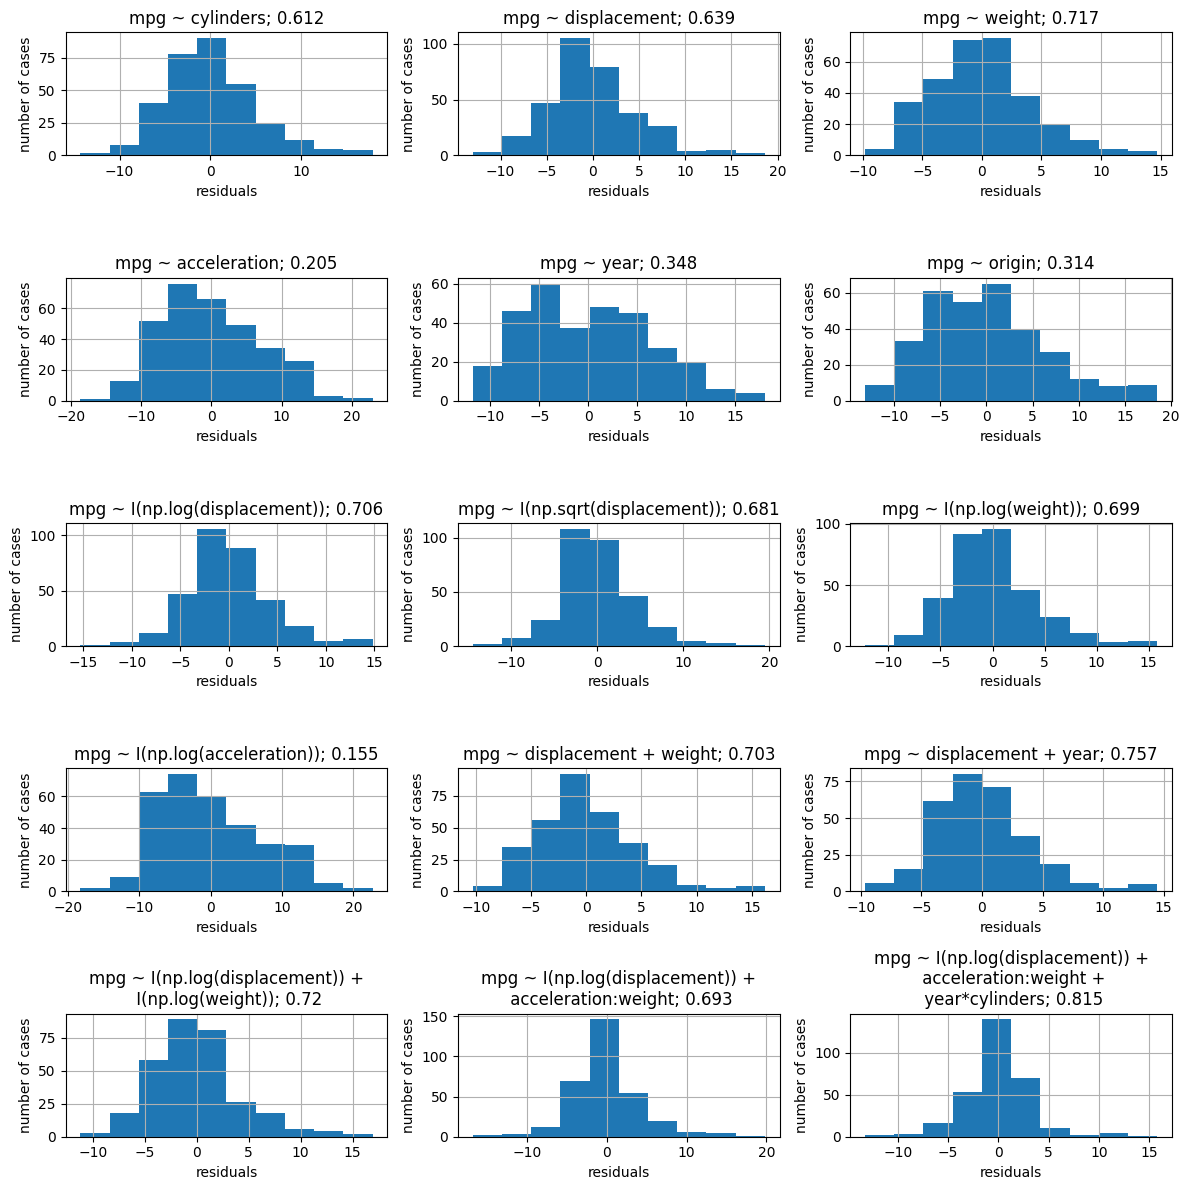

In [81]:
def myLinReg(model_formula, df, printMSE = False):
    """
    Function returns the summary for fitted linear model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """
    
    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
        
    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = sm.OLS(y_train, X_train) 
    result = model.fit() 

    
    # Show MSE for training set
    if(printMSE==True):
        y_train_pred = result.predict(X_train)
        print(f'MSE_Train: {metrics.mean_squared_error(y_train, y_train_pred)}')

    # Show MSE for validation set
    if(printMSE==True):
        y_valid_pred = result.predict(X_valid)
        print(f'MSE_Test: {metrics.mean_squared_error(y_valid, y_valid_pred)}\n')

    # Retrun fitted model summary
    return result

models = [
    'mpg ~ cylinders',
    'mpg ~ displacement',
    'mpg ~ weight',
    'mpg ~ acceleration',
    'mpg ~ year',
    'mpg ~ origin',
    'mpg ~ I(np.log(displacement))',
    'mpg ~ I(np.sqrt(displacement))',
    'mpg ~ I(np.log(weight))',
    'mpg ~ I(np.log(acceleration))',
    'mpg ~ displacement + weight',
    'mpg ~ displacement + year',
    'mpg ~ I(np.log(displacement)) +\n I(np.log(weight))',
    'mpg ~ I(np.log(displacement)) +\n acceleration:weight',
    'mpg ~ I(np.log(displacement)) +\n acceleration:weight +\n year*cylinders'
]

# Verify that residuals follow normal distribiution and look for outliers
fig = plt.figure(figsize=(12, 12))
for i,model in enumerate(models):
    fig.add_subplot(5, 3, i+1)
    result_i = myLinReg(model,df)
    ax = result_i.resid.hist()
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f'{models[i]}; {round(result_i.rsquared,3)}')
    plt.tight_layout()

d)

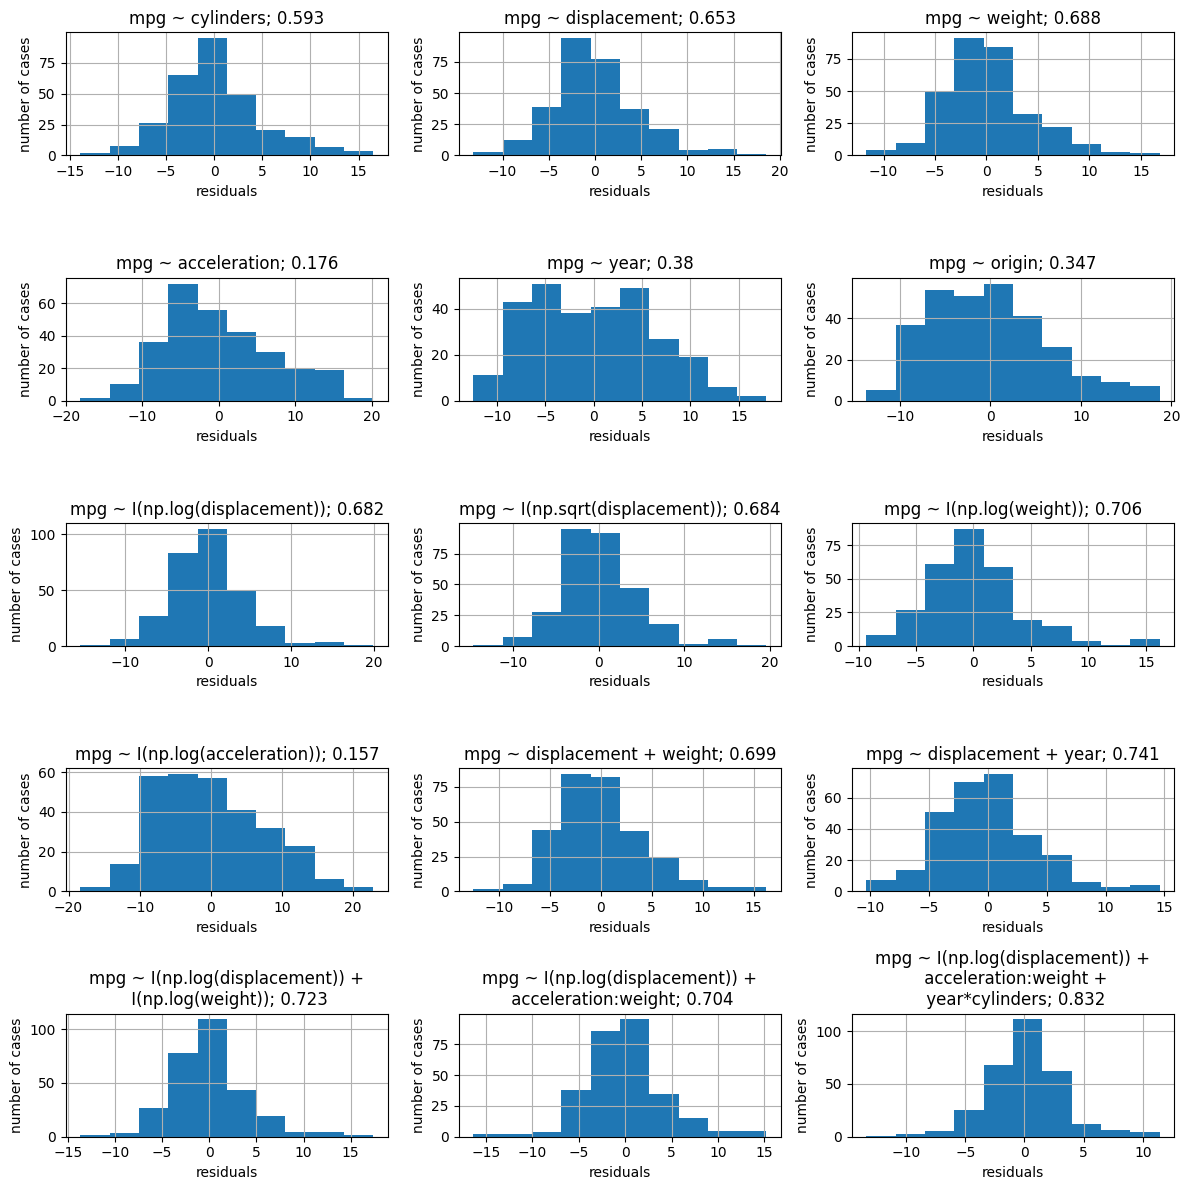

In [82]:
def clean_data(df, result):
    outliers = []
    leverage = result.get_influence().hat_matrix_diag
    for i,resid in enumerate(result.resid_pearson):
        if abs(resid) > 2 or leverage[i] > 0.04:
            outliers.append(i)
    return df[~df.index.isin(outliers)]

df = clean_data(df,myLinReg(models[-1],df))

fig = plt.figure(figsize=(12, 12))
for i,model in enumerate(models):
    fig.add_subplot(5, 3, i+1)
    result_i = myLinReg(model,df)
    ax = result_i.resid.hist()
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f'{models[i]}; {round(result_i.rsquared,3)}')
    plt.tight_layout()